# Newton's Method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def NewtonsMethod(func, derv, x_0, err, cutoff) -> float:
    # Uses Newton's Method of finding roots. Has quadratic convergence time (versus log convergence). Works for real and complex numbers
    fun_eval = func(x_0)
    der_eval = derv(x_0)
    # Edge cases
    if fun_eval == 0:
        return x_0
    elif der_eval == 0:
        return None
    
    iterations = 0
    
    x_n = x_0
    x_n1 = x_n - (fun_eval/der_eval)
    while(abs(fun_eval) > 10**(-err)):
        iterations += 1
        if (iterations > 10**(cutoff)): # Cutoff for when we decide a point is "divergent". Unfortunate if we are simply too far from the root but about to converge
            return None

        fun_eval = func(x_n1)
        der_eval = derv(x_n1)
        if der_eval == 0:
            return None
        
        x_n = x_n1
        x_n1 = x_n - (fun_eval/der_eval)
        
    return x_n1

In [9]:
# Marks colors to determine basins of attraction
def rootCollection_real(a, b, n, y_str : str, func, derv, roots: dict, err : int) -> None:
    # Collection of roots, O(1) space complexity, quadratic convergence for each point (at most 1000 iterations of Newton's Method run), with rn checks for r the number of roots 
    x = np.linspace(a, b, n)

    for point in x:
        calc_root = NewtonsMethod(func, derv, point, err, 3)
        if calc_root is not None:
            # When we converge to a root
            for root in roots.keys():
                if abs(root - calc_root) < 10**(-err):
                    plt.scatter(point, func(point), c = roots[root], s = 10, linewidth = 0)
        elif calc_root is None:
            # When we have diverged from a root
            plt.scatter(point, func(point), c = 'black', s = 10, linewidth = 0)
    
   
    for root in roots.keys():
        plt.axvline(root, label= ("x = " + str(root)), color=roots[root])
    
    plt.xlim(a,b)
    plt.xlabel("x-axis")
    plt.ylabel(y_str)
    plt.grid()
    plt.legend()
    plt.show()

def rootCollection_complex(a, b, n : int, y_str : str, func, derv, roots: dict, err : int) -> None:
    # Collection of roots, O(1) space complexity, quadratic convergence for each point (at most 1000 iterations of Newton's Method run), with rn checks for r the number of roots 
    x = np.linspace(a, b, n)
    y = np.linspace(a, b, n)

    for real_point in x:
        for im_point in y:
            point = np.array(real_point + 0j)
            point.imag = np.array([im_point])
            # point = point_arr
            calc_root = NewtonsMethod(func, derv, point, err, 3)
            if calc_root is not None:
                # When we converge to a root
                for root in roots.keys():
                    if abs(root - calc_root) < 10**(-err):
                        plt.scatter(point.real, point.imag, c = roots[root], s = 10, linewidth = 0)
            elif calc_root is None:
                # When we have diverged from a root
                plt.scatter(point.real, point.imag, c = 'black', s = 10, linewidth = 0)
    
   
    for root in roots.keys():
        # Plot roots
        plt.plot(root.real, root.imag, label= ("x = " + str(root)), color=roots[root])
    
    plt.xlim(a,b)
    plt.ylim(a,b)
    plt.xlabel("Real axis")
    plt.ylabel("Complex axis")
    plt.title(y_str)
    plt.grid()
    plt.legend()
    plt.show()

In [4]:
# Functions and Associated Roots with color labels
f = lambda x: (x - 4) * (x + 1)
g = lambda x: (x - 1) * (x + 3)
h = lambda x: (x - 4) * (x - 1) * (x + 3)
gamma_1 = lambda x: np.log(x)
gamma_2 = lambda x: x**6 - 25*x**5 + 237*x**4 - 1031*x**3 + 1802*x**2 + 216*x - 2880

f_prime = lambda x: 2 * x - 3
g_prime = lambda x: 2 * x + 2
h_prime = lambda x: 3*x**2 - 4*x - 11
gamma_1_prime = lambda x: x**-1
gamma_2_prime = lambda x: 6*x**(5)-125*x**(4)+948*x**(3)-3093*x**(2)+3604*x+216

f_dict = {4 : 'blue', -1 : 'green'}
g_dict = {1 : 'blue', -3 : 'green'}
h_dict = {4 : 'blue', 1 : 'green', -3 : 'red'}
gamma_1_dict = {1 : 'blue'}
gamma_2_dict = {-1 : 'blue', 3 : 'green', 4 : 'red', 5 : 'yellow', 6 : 'magenta', 8 : 'purple'}

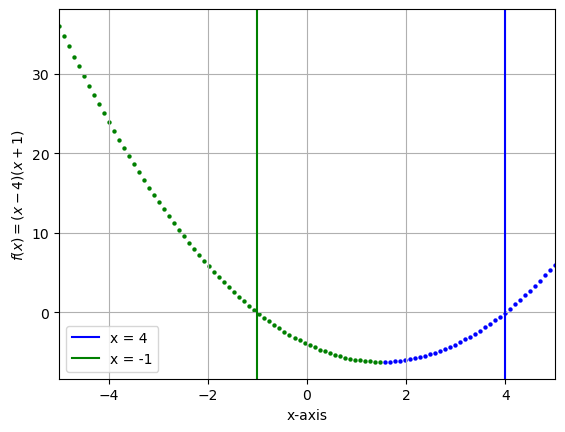

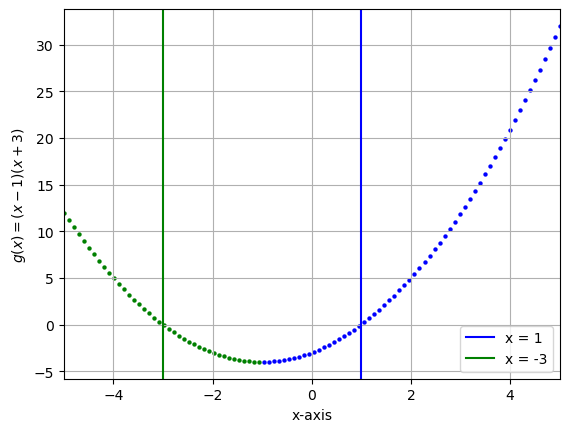

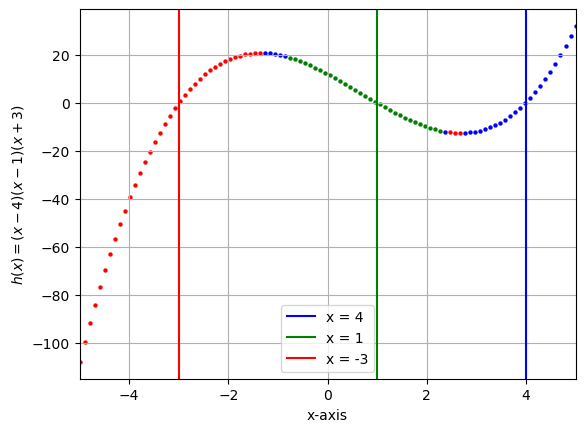

/var/folders/ky/r_bpjsyd6h97cqjfvq97mgx40000gn/T/ipykernel_5830/2172697451.py:5: RuntimeWarning: invalid value encountered in log
  gamma_1 = lambda x: np.log(x)


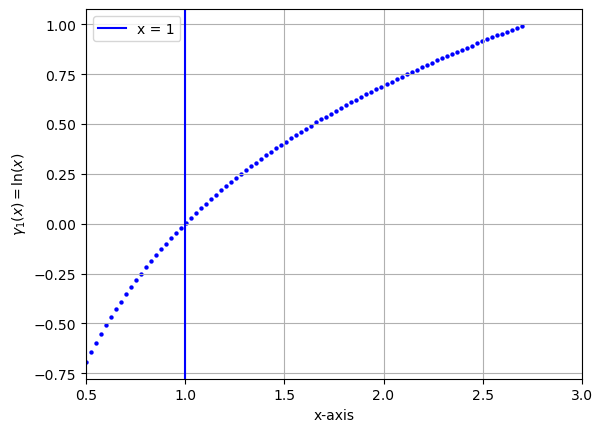

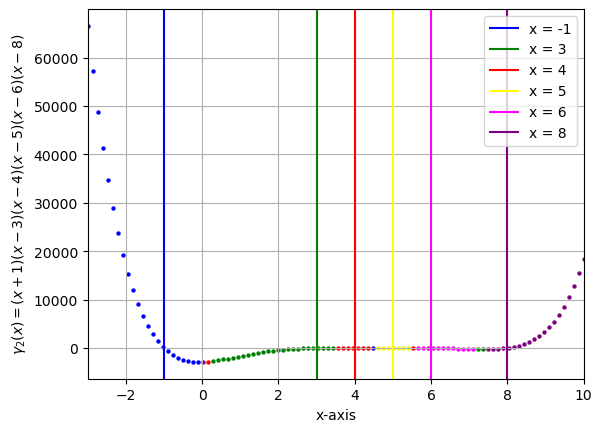

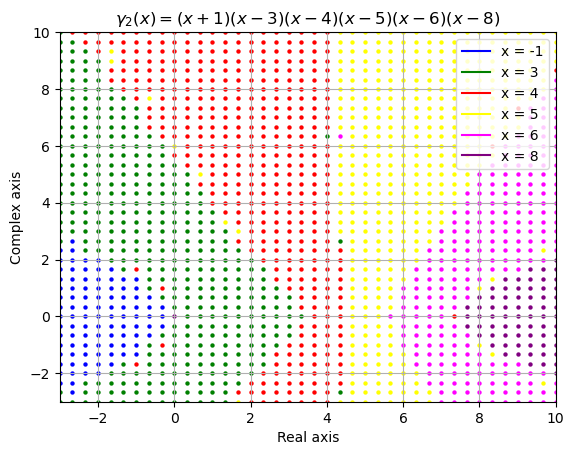

In [10]:
rootCollection_real(-5, 5, 100, "$f(x) = (x - 4)(x + 1)$", f, f_prime, f_dict, 6)
rootCollection_real(-5, 5, 100, "$g(x) = (x - 1)(x + 3)$", g, g_prime, g_dict, 6)
rootCollection_real(-5, 5, 100, "$h(x) = (x - 4)(x - 1)(x + 3)$", h, h_prime, h_dict, 6)
rootCollection_real(0.5, 3, 100, "$\gamma_1(x) = \ln(x)$", gamma_1, gamma_1_prime, gamma_1_dict, 6)
rootCollection_real(-3, 10, 100, "$\gamma_2(x) = (x + 1)(x - 3)(x - 4)(x - 5)(x - 6)(x - 8)$", gamma_2, gamma_2_prime, gamma_2_dict, 6)

rootCollection_complex(-3, 10, 40, "$\gamma_2(x) = (x + 1)(x - 3)(x - 4)(x - 5)(x - 6)(x - 8)$", gamma_2, gamma_2_prime, gamma_2_dict, 6)